# Gaussian Rationals

See [Python fractions](https://docs.python.org/3/library/fractions.html)

In [1]:
from gaussian_integers import Gint
from fractions import Fraction
from gaussian_rationals import Grat

## Resources

* [Irreducible fractions](https://mathworld.wolfram.com/IrreducibleFraction.html) - Wolfram

In [2]:
foo = Grat(Fraction("1/2"), Fraction("3/5"))
foo

Grat(Fraction(1, 2), Fraction(3, 5))

In [3]:
bar = Grat(Fraction("2/3"), Fraction("1/7"))
bar

Grat(Fraction(2, 3), Fraction(1, 7))

In [4]:
print(foo)
print(bar)

(1/2+3/5j)
(2/3+1/7j)


In [5]:
print(foo + bar)

(7/6+26/35j)


In [6]:
print(foo * bar)

(26/105+33/70j)


In [7]:
print(foo.conj)

(1/2-3/5j)


In [8]:
print(foo.norm)

61/100


In [9]:
print(foo.inv)

(50/61-60/61j)


In [10]:
print(foo * foo.inv)

(1+0j)


In [11]:
print(f"{foo} / {bar} -> {foo/bar}")

(1/2+3/5j) / (2/3+1/7j) -> (924/1025+1449/2050j)


In [12]:
cfoo = complex(foo)
cbar = complex(bar)
print(cfoo)
print(cbar)
print(cfoo / cbar)
print(complex(foo/bar))

(0.5+0.6j)
(0.6666666666666666+0.14285714285714285j)
(0.9014634146341464+0.7068292682926829j)
(0.9014634146341464+0.7068292682926829j)


In [13]:
print(bar)
print(-bar)

(2/3+1/7j)
(-2/3-1/7j)


In [14]:
g1 = Gint(2, 6)
g2 = Gint(4, 5)

In [15]:
g1 / g2

(0.926829268292683+0.3414634146341464j)

In [16]:
# rat = gint2grat(g1, g2)
rat = Grat(g1, g2)
rat

Grat(Fraction(38, 41), Fraction(14, 41))

In [17]:
print(rat)

(38/41+14/41j)


In [18]:
complex(rat)

(0.926829268292683+0.34146341463414637j)

In [19]:
print(foo**3)

(-83/200+117/500j)


In [20]:
print(foo * foo * foo)

(-83/200+117/500j)


### Example 1 from Wolfram

In [21]:
from gaussian_integers import gcd, xgcd, mod_divmod

In [27]:
a = Gint(4, 7)
b = Gint(2, 1)

In [28]:
print(f"a = {a}\nb = {b}")

g = gcd(a, b)
print(f"gcd({a}, {b}) = {gcd(a, b)}")

q, r = mod_divmod(a, b)
print(f"{a} = {b} * {q} + {r}")

print(a / b)
print(Grat(a, b))

a = (4+7j)
b = (2+1j)
gcd((4+7j), (2+1j)) = (2+1j)
(4+7j) = (2+1j) * (3+2j) + 0j
(3+2j)
(3+2j)


### Example 2 from Wolfram

In [24]:
a = Gint(5, 5)
b = Gint(7, 1)

In [25]:
print(f"a = {a}\nb = {b}")

g = gcd(a, b)
print(f"gcd({a}, {b}) = {gcd(a, b)}")

q, r = mod_divmod(a, b)
print(f"{a} = {b} * {q} + {r}")

print(a / b)
print(Grat(a, b))

a = (5+5j)
b = (7+1j)
gcd((5+5j), (7+1j)) = (-1-3j)
(5+5j) = (7+1j) * (1+1j) + (-1-3j)
(0.7999999999999999+0.6j)
(4/5+3/5j)


In [32]:
from gaussian_integers import Gint, is_gaussian_prime

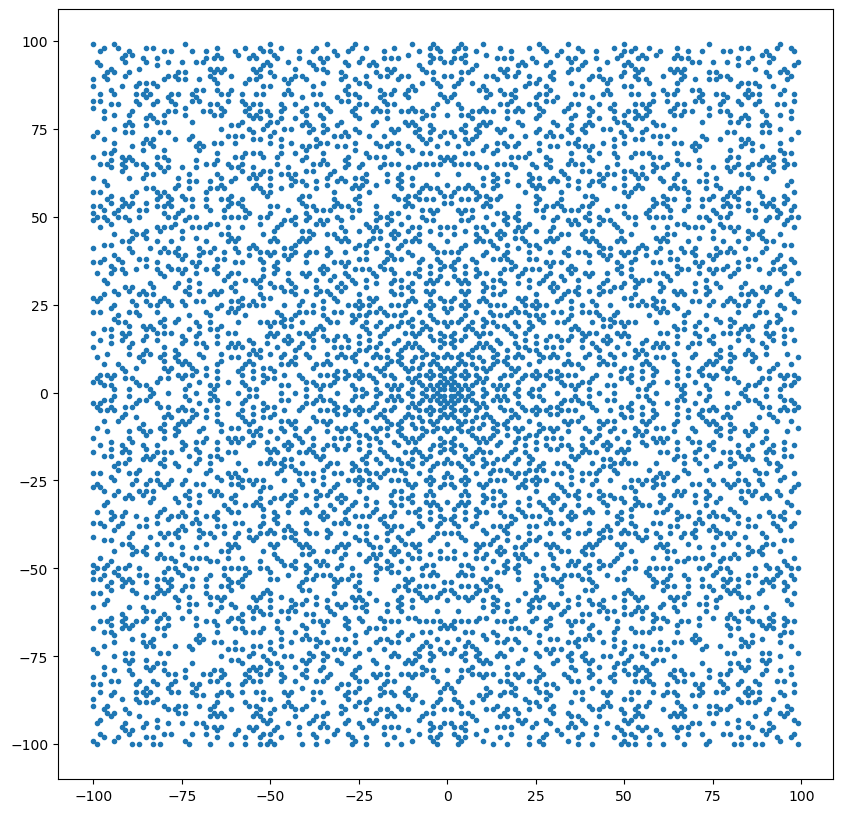

In [47]:
nx = 100
ny = 100
xs = []
ys = []

for x in range(-nx, nx):
    for y in range(-ny, ny):
        gi = Gint(x, y)
        if is_gaussian_prime(gi):
            xs.append(x)
            ys.append(y)

plt.figure(figsize=(10, 10))
plt.scatter(xs, ys, marker=".")
_ = plt.show